In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file =  'test.p'
csv_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(csv_file, mode='r') as f:
    signs = list(csv.reader(f))
    signs = signs[1:] # skip header
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

(34799, 32, 32, 3)
Sign description: 'Yield'


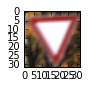

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print(X_train.shape)

plt.figure(figsize=(1,1))
plt.imshow(image)
print("Sign description: '{}'".format(signs[y_train[index]][1]))

(34799, 32, 32)
Sign description: 'Yield'


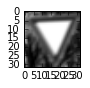

In [106]:
from skimage import color
X_train_g = color.rgb2gray(X_train)
print(X_train_g.shape)
image = X_train_g[index]
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print("Sign description: '{}'".format(signs[y_train[index]][1]))

Sign description: 'Yield'


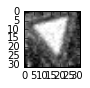

In [107]:
from skimage.transform import AffineTransform, warp
from skimage.util import random_noise

ty, tx = np.array(image.shape[:2]) / 2.
tf_shift = AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=(-tx, -ty))
scx = random.uniform(1,1.05) ; scy = random.uniform(1,1.05) ; rot = random.uniform(-0.2,0.2) ; shr = random.uniform(-0.1,0.1)
tf_affine = AffineTransform(matrix=None, scale=(scx, scy), rotation=rot, shear=shr, translation=None)
tf_shift_inv = AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=(tx, ty))
image = warp(image, (tf_shift + (tf_affine + tf_shift_inv)).inverse)
image = random_noise(image, mode='gaussian', mean=0, var=0.005)
#image = random_noise(image, mode='s&p', amount=0.01, salt_vs_pepper=0.75)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print("Sign description: '{}'".format(signs[y_train[index]][1]))

Sign description: 'Yield'


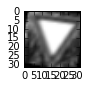

In [103]:
a = 0.1 ; b = 0.9
xmin = np.amin(image)
xmax = np.amax(image)
image = (a + ((image - xmin)/(xmax - xmin))*(b - a))
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print("Sign description: '{}'".format(signs[y_train[index]][1]))

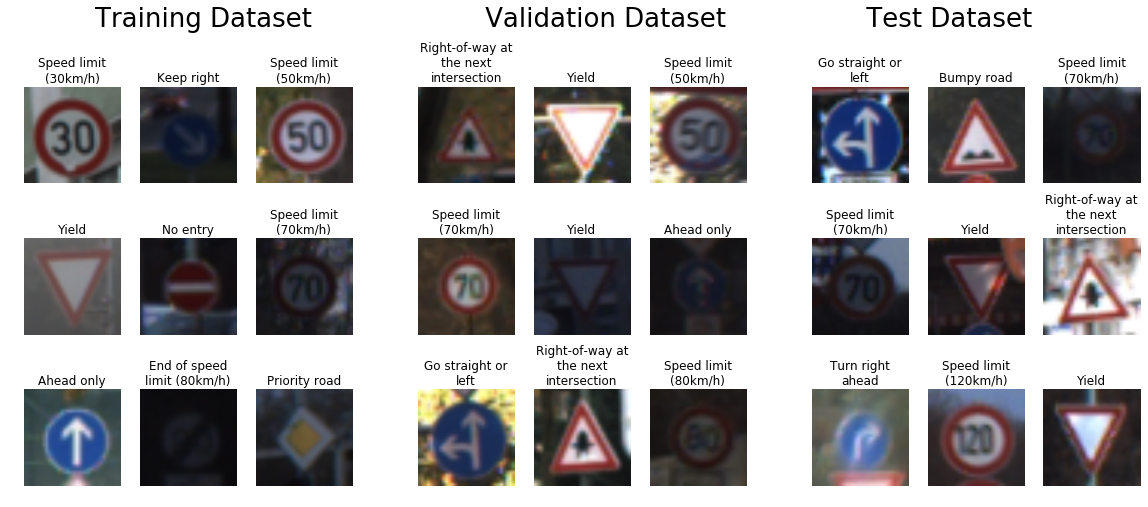

In [198]:
import itertools
from textwrap import wrap

f = plt.figure(figsize=(20,7))
f.suptitle('Training Dataset                     Validation Dataset                 Test Dataset', fontsize=26)
fgs = gridspec.GridSpec(1, 3)
fgs.update(top=0.85,bottom=0.0)

ssp = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=fgs[0])
indices = np.random.randint(0, len(X_train), size=9)
for rc, i in zip(itertools.product(range(3),range(3)),range(9)):
    a=plt.Subplot(f, ssp[rc[0], rc[1]])
    a.axis('off')
    a.set_title('\n'.join(wrap(signs[y_train[indices[i]]][1],15)))
    a.imshow(X_train[indices[i]])
    f.add_subplot(a)

ssp = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=fgs[1])
indices = np.random.randint(0, len(X_valid), size=9)
for rc, i in zip(itertools.product(range(3),range(3)),range(9)):
    a=plt.Subplot(f, ssp[rc[0], rc[1]])
    a.axis('off')
    a.set_title('\n'.join(wrap(signs[y_valid[indices[i]]][1],15)))
    a.imshow(X_valid[indices[i]])
    f.add_subplot(a)

ssp = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=fgs[2])
indices = np.random.randint(0, len(X_test), size=9)
for rc, i in zip(itertools.product(range(3),range(3)),range(9)):
    a=plt.Subplot(f, ssp[rc[0], rc[1]])
    a.axis('off')
    a.set_title('\n'.join(wrap(signs[y_test[indices[i]]][1],15)))
    a.imshow(X_test[indices[i]])
    f.add_subplot(a)

plt.show()

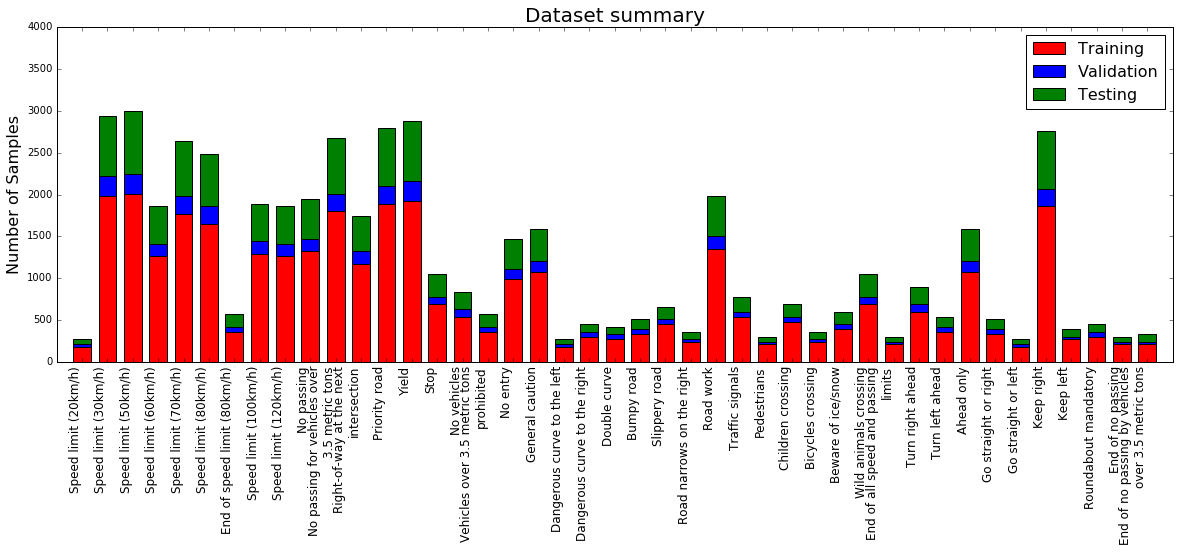

In [309]:
# histogram of label frequency
from textwrap import wrap

n_classes = 43
width = 0.7

labels = []
for s in signs:
    labels.append('\n'.join(wrap(s[1],30)))

h_train, b_train = np.histogram(y_train, bins=n_classes)
h_valid, b_valid = np.histogram(y_valid, bins=n_classes)
h_test,  b_test  = np.histogram(y_test,  bins=n_classes)

p1 = plt.bar(range(n_classes), h_train, width, color='red', align='center')
p2 = plt.bar(range(n_classes), h_valid, width, bottom=h_train, color='blue', align='center')
p3 = plt.bar(range(n_classes), h_test,  width, bottom=h_train+h_valid, color='green', align='center')

plt.ylabel('Number of Samples', fontsize=16)
plt.title('Dataset summary', fontsize=20)
plt.xticks(range(n_classes), labels, rotation='vertical', fontsize=12, ha='right')
plt.xlim(-1,43)
plt.yticks(np.arange(0, 4001, 500))
plt.legend((p1[0], p2[0], p3[0]), ('Training', 'Validation', 'Testing'), fontsize=16)

fig = plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)

plt.show()